In [1]:
import numpy as np
import matplotlib.pyplot as plt

## ベルヌーイ分布の学習と予測
共役事前分布 : Beta分布

In [6]:
from scipy.stats import bernoulli
from scipy.stats import beta

# 訓練データの生成
p = 0.3 # 真の成功確率
trial = 20 # 試行回数

x =bernoulli.rvs(p=p, size=trial)
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

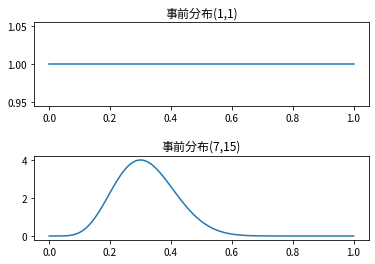

ベイズ推定量 : 0.318182


In [7]:
# 超パラメータ
alpha_pre,beta_pre = 1,1

# 事後分布の計算
alpha_pro = alpha_pre + x.sum()
beta_pro = trial + beta_pre - x.sum()

xscale = np.linspace(0,1,100)
prob_pre = beta.pdf(xscale,alpha_pre,beta_pre)
prob_pro = beta.pdf(xscale,alpha_pro,beta_pro)
plt.figure(facecolor="white")
plt.subplot(2,1,1)
plt.plot(xscale,prob_pre)
plt.title("事前分布("+str(alpha_pre)+","+str(beta_pre)+")")

plt.subplot(2,1,2)
plt.plot(xscale,prob_pro)
plt.title("事前分布("+str(alpha_pro)+","+str(beta_pro)+")")
plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()

print("ベイズ推定量 : %lf" %(alpha_pro/(alpha_pro+beta_pro)))

# 予測分布

[0.5 0.5]
[0.68181818 0.31818182]


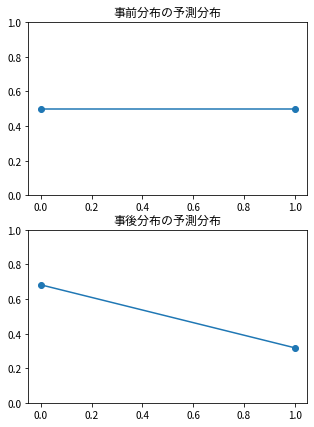

In [18]:
# 事前分布のとき
p_pre = alpha_pre/(alpha_pre+beta_pre)
# 事後分布のとき
p_pro = alpha_pro/(alpha_pro+beta_pro)

xscale = np.array([0,1])
predict_pre = bernoulli.pmf(xscale,p_pre)
predict_pro = bernoulli.pmf(xscale,p_pro)
print(predict_pre)
print(predict_pro)

plt.figure(facecolor="white",figsize=(5,7))
plt.subplot(2,1,1)
plt.plot(xscale,predict_pre)
plt.scatter(xscale,predict_pre)
plt.ylim(0,1)
plt.title("事前分布の予測分布")

plt.subplot(2,1,2)
plt.plot(xscale,predict_pro)
plt.scatter(xscale,predict_pro)
plt.ylim(0,1)
plt.title("事後分布の予測分布")
plt.show()